# Random Forest using Weighted Class method 

## Few explanations about the thought processes before implementing the model and preprocessing:

<h3 style="font-size: 18px; color: #c92966;">Hello guys, in this project I’m trying to implement a model, that can predict fraud transactions.</h3>

<p style="font-size: 16px; color: #22b2a3;">
    Here is the thing, when working with imbalanced datasets, traditional metrics like accuracy can be misleading. For example, if only 1% of your dataset is fraudulent transactions and your model predicts "not fraud" for every instance, you would still achieve 99% accuracy. This doesn’t reflect the actual performance of the model on the minority class (fraudulent transactions). Therefore, you need metrics that can show how well the model performs on both classes, particularly the minority class.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    Another thing is when training your model on an imbalanced dataset like credit card fraud detection, instead of looking at accuracy, you’ll want to monitor <span style="color: #3498db;">precision</span>, <span style="color: #3498db;">recall</span>, <span style="color: #3498db;">F1-score</span>, and <span style="color: #3498db;">AUC-ROC</span>.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    For example, if your goal is to catch all possible fraud (high recall), you might sacrifice some precision, knowing that you'll flag more transactions as fraud (including false positives), but miss fewer actual fraud cases. On the other hand, if you want to minimize the disruption for customers (high precision), you might be willing to miss some fraudulent transactions.
</p>


<h3 style="font-size: 18px; color: #c92966;">Understanding Loss Functions and Evaluation Metrics</h3>


<p style="font-size: 16px; color: #22b2a3;">
    <span style="color: #3498db;">Precision</span> tells you how many of the predicted frauds were actually fraudulent, while <span style="color: #3498db;">recall</span> measures how many actual fraudulent transactions were correctly identified. The <span style="color: #3498db;">F1-score</span> balances these two, being especially useful when you need to weigh both false positives and false negatives. Additionally, <span style="color: #3498db;">AUC-ROC</span> evaluates the trade-off between true positives and false positives across various threshold values.
</p>

<h3 style="font-size: 18px; color: #d01aa4;">Choosing the Best Method</h3>

<p style="font-size: 16px; color: #22b2a3;">
    When dealing with imbalanced datasets and diverse feature ranges, selecting the right scaling method is crucial:
</p>

<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>Min-Max Scaling</strong>: Suitable when you have a bounded range of values without extreme outliers.</li>
    <li><strong>Z-Score Normalization</strong>: Works best when your data has a normal distribution and you want to account for both large and small ranges in features.</li>
    <li><strong>Robust Scaling</strong>: The best choice when your data has outliers, as it minimizes their impact.</li>
</ul>

<p style="font-size: 16px; color: #22b2a3;">
    By carefully selecting loss functions and scaling methods based on your dataset’s characteristics, you ensure your model performs optimally on both the minority and majority classes, especially in high-stakes situations like fraud detection.
</p>


<h3 style="font-size: 18px; color: #c92966;">1. What are Outliers?</h3>

<p style="font-size: 16px; color: #22b2a3;">
    An outlier is a data point that differs significantly from other observations. It can be unusually high or low compared to the bulk of the data. Outliers can occur due to variability in the data or errors in measurement.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    For example, in a dataset of transaction amounts, most might be in the range of $10 to $500, but you might have a few transactions of $10,000 or more—those could be considered outliers.
</p>

<h3 style="font-size: 18px; color: #c92966;">Why Outliers Matter:</h3>

<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>In Min-Max Scaling</strong>: Outliers can skew the scaling because it forces the entire data range to stretch to accommodate them, potentially making smaller values look almost constant.</li>
    <li><strong>In Z-Score Normalization</strong>: Outliers can impact the mean and standard deviation, which the formula depends on. This can lead to poor scaling for the majority of the data points.</li>
</ul>

<h3 style="font-size: 18px; color: #c92966;">How to Detect Outliers:</h3>

<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>Box Plot</strong>: A visual method to detect outliers. Outliers appear as individual points outside the “whiskers.”</li>
    <li><strong>Z-Score</strong>: Any data point that has a Z-score greater than 3 or less than -3 can be considered an outlier.</li>
    <li><strong>IQR Method</strong>: Calculate the interquartile range (IQR). Any point more than 1.5 times the IQR above the third quartile (Q3) or below the first quartile (Q1) can be considered an outlier.</li>
</ul>

<h3 style="font-size: 18px; color: #c92966;">2. How Do You Know if Data Has a Normal Distribution?</h3>

<p style="font-size: 16px; color: #22b2a3;">
    A normal distribution is a bell-shaped curve where most of the data points are concentrated around the mean, and fewer points appear as you move further away from the mean. It’s symmetric, and both tails taper off equally.
</p>

<h3 style="font-size: 18px; color: #c92966;">Why It Matters:</h3>

<p style="font-size: 16px; color: #22b2a3;">
    If your data follows a normal distribution, you can use methods like <span style="color: #3498db;">Z-Score Normalization</span> effectively. If your data doesn’t follow a normal distribution (i.e., it’s skewed or has outliers), then <span style="color: #3498db;">Robust Scaling</span> might be more appropriate.
</p>

<h3 style="font-size: 18px; color: #c92966;">How to Check if Data is Normally Distributed:</h3>

<h4 style="font-size: 16px; color: #c92966;">Visual Methods:</h4>
<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>Histogram</strong>: A quick way to see the distribution. If it looks like a bell curve, it’s likely normal.</li>
    <li><strong>Q-Q Plot (Quantile-Quantile Plot)</strong>: Compares the distribution of your data to a theoretical normal distribution. If the points fall roughly along a straight line, your data is normally distributed.</li>
</ul>

<h4 style="font-size: 16px; color: #c92966;">Statistical Methods:</h4>
<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>Skewness</strong>: If the skewness is close to 0, your data is symmetric. Positive values indicate a right (positive) skew, and negative values indicate a left (negative) skew.</li>
    <li><strong>Kurtosis</strong>: Measures the “tailedness” of the distribution. For a normal distribution, kurtosis should be close to 3.</li>
    <li><strong>Shapiro-Wilk Test</strong>: A statistical test that tests the null hypothesis that the data is normally distributed. A low p-value (less than 0.05) indicates that the data is not normally distributed.</li>
</ul>


## Importing the Basic libraries and reading the data:

In [2]:
import numpy as np 
import pandas as pd

# Visualizations 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
import warnings

# Ignore all FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [19]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [20]:
df.shape

(284807, 31)

In [21]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Unbalanced data:

<p style="font-size: 16px; color: #22b2a3;">
    As you can see, the dataset is highly imbalanced, with 284,315 instances of class 0 (non-fraudulent transactions) and only 492 instances of class 1 (fraudulent transactions). This stark imbalance can make it challenging for machine learning models to correctly identify fraud cases, as the model may be biased toward the majority class (non-fraud).
</p>

In [22]:
print(np.bincount(df['Class']))

[284315    492]


## Checking for scales:

<p style="font-size: 16px; color: #22b2a3;">
    Here I'm trying to understand the min and max values of each column to see if it needs scaling or not, because without it the model will face problems.
</p>


In [8]:
min_max_values = {}

for column in df.columns:
    
    min_value = df[column].min()
    max_value = df[column].max()
    
    min_max_values[column] = (min_value, max_value)

min_max_tuples = [(col, min_max_values[col]) for col in min_max_values]


for i in min_max_tuples: 
    print(i)


('Time', (0.0, 172792.0))
('V1', (-56.407509631329, 2.45492999121121))
('V2', (-72.7157275629303, 22.0577289904909))
('V3', (-48.3255893623954, 9.38255843282114))
('V4', (-5.68317119816995, 16.8753440335975))
('V5', (-113.743306711146, 34.8016658766686))
('V6', (-26.1605059358433, 73.3016255459646))
('V7', (-43.5572415712451, 120.589493945238))
('V8', (-73.2167184552674, 20.0072083651213))
('V9', (-13.4340663182301, 15.5949946071278))
('V10', (-24.5882624372475, 23.7451361206545))
('V11', (-4.79747346479757, 12.0189131816199))
('V12', (-18.6837146333443, 7.8483920756446))
('V13', (-5.79188120632084, 7.12688295859376))
('V14', (-19.2143254902614, 10.5267660517847))
('V15', (-4.49894467676621, 8.87774159774277))
('V16', (-14.1298545174931, 17.3151115176278))
('V17', (-25.1627993693248, 9.25352625047285))
('V18', (-9.49874592104677, 5.04106918541184))
('V19', (-7.21352743017759, 5.59197142733558))
('V20', (-54.497720494566, 39.4209042482199))
('V21', (-34.8303821448146, 27.2028391573154))

<p style="font-size: 16px; color: #22b2a3;">
    As you can see, the model has very different values for each feature, so even for models like <span style="color: #3498db;">Random Forest (RF)</span>, this is not ideal. It needs scaling, and as explained above, <span style="color: #3498db;">Robust Scaling</span> is the most appropriate choice.
</p>


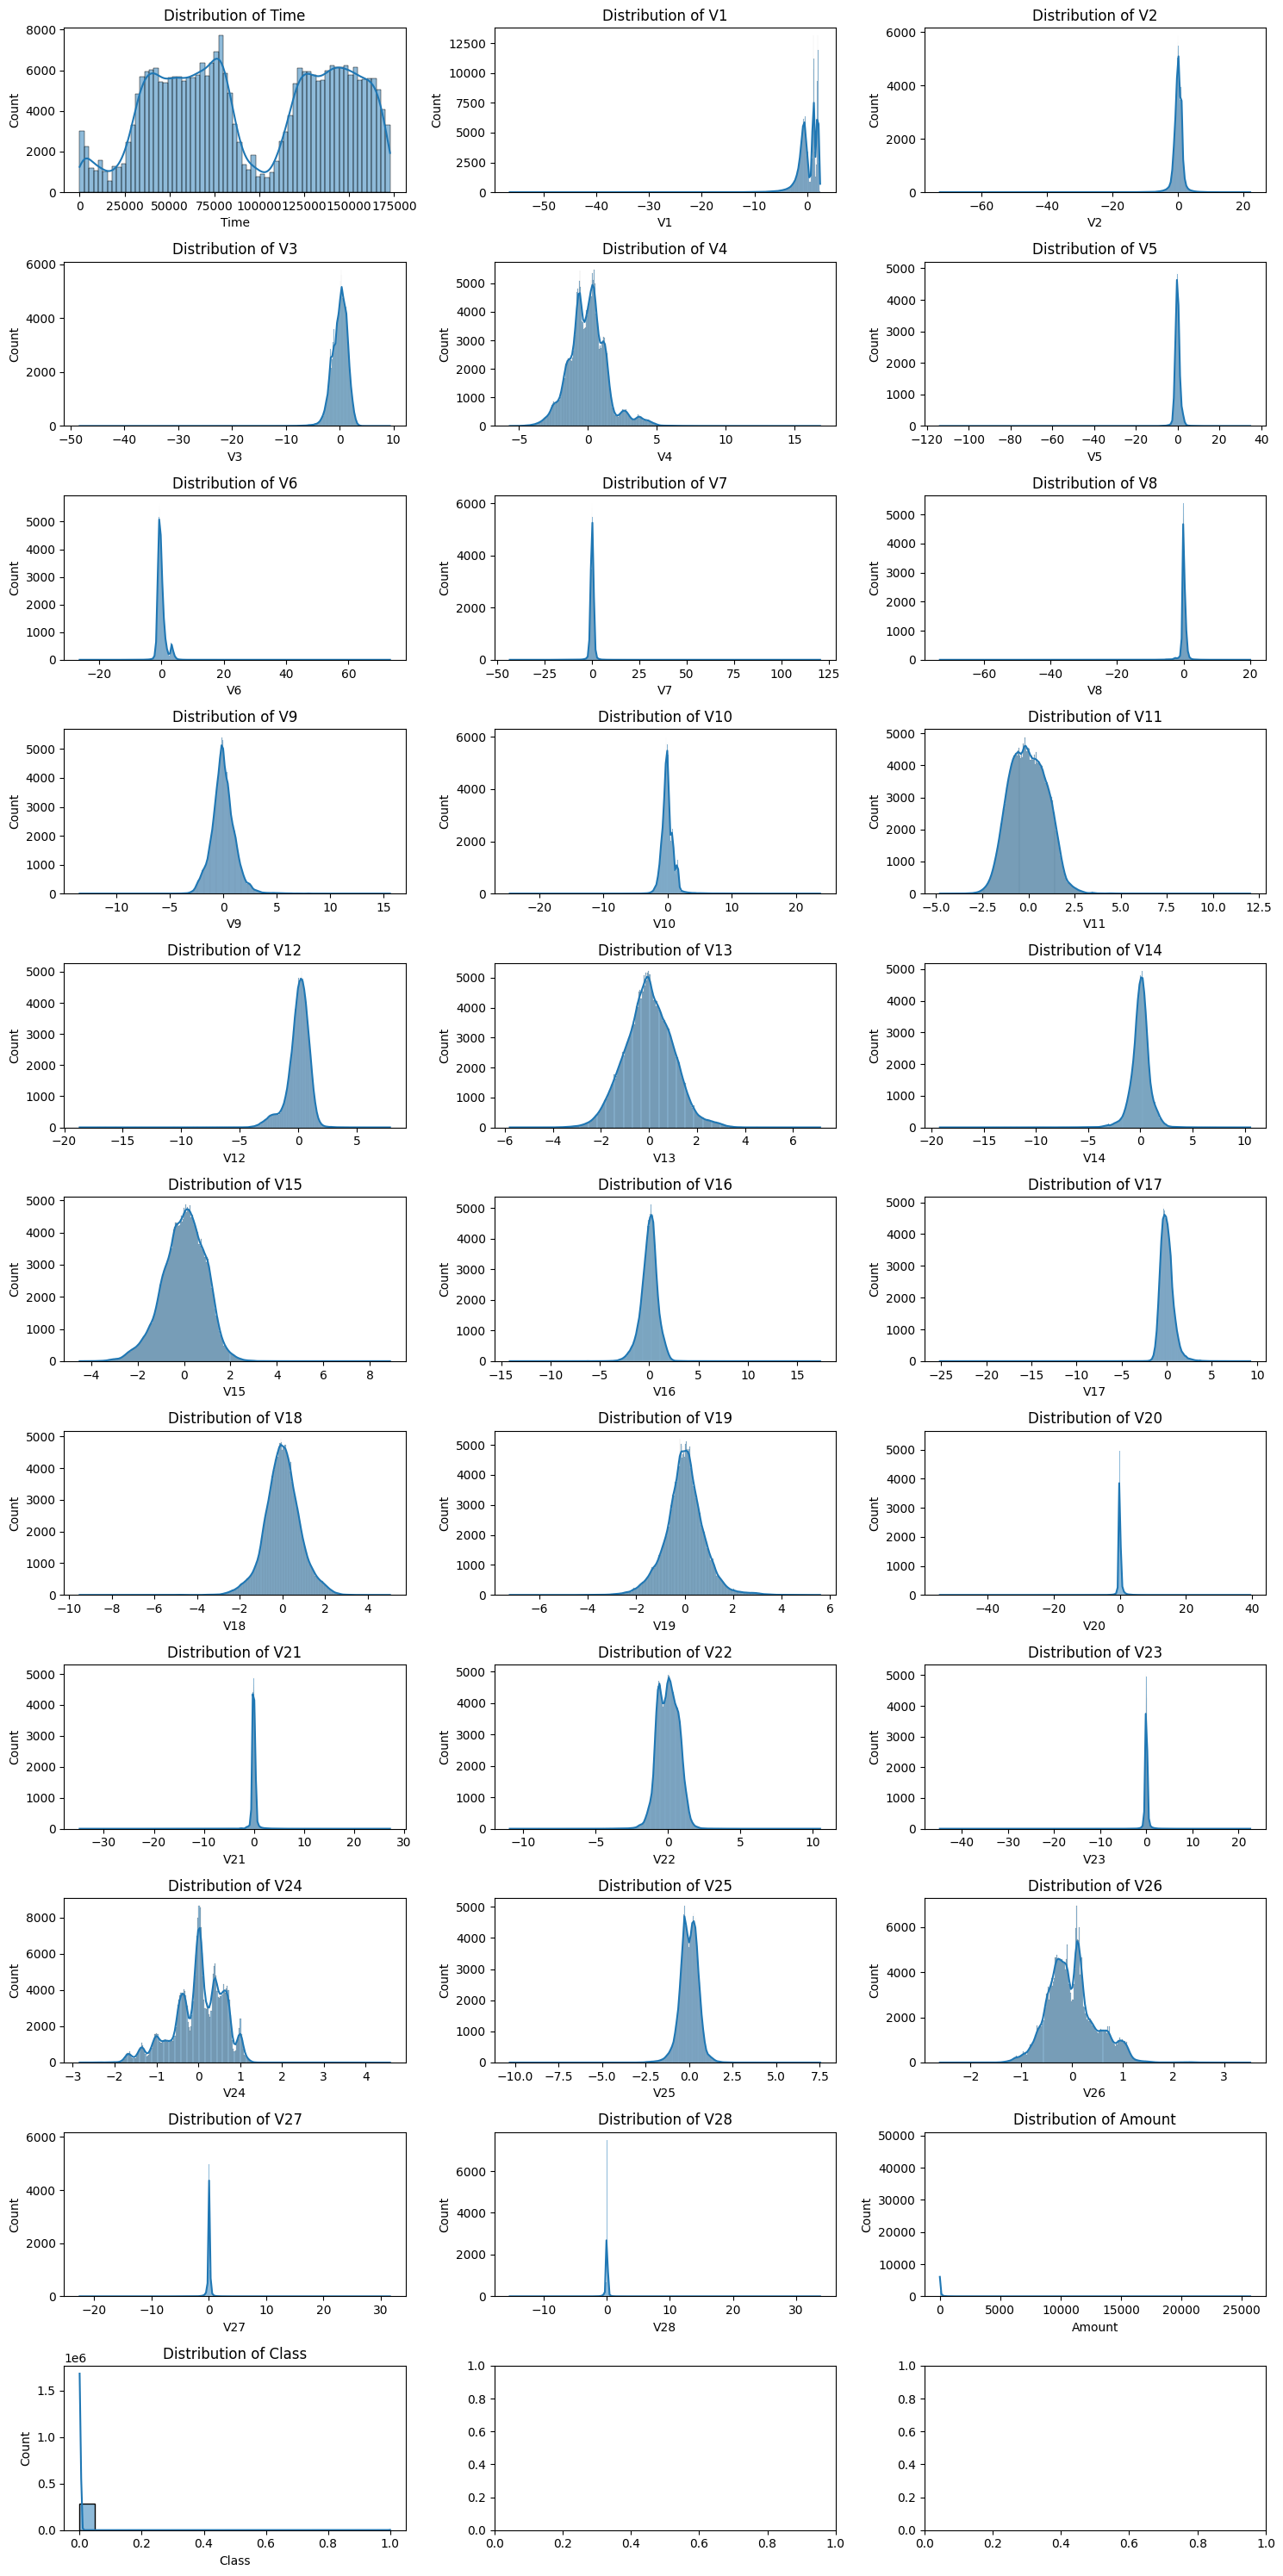

In [10]:
fig, axes = plt.subplots(11, 3, figsize=(15, 30))
for i, column in enumerate(df.columns[:31]):
    sns.histplot(df[column], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [23]:
from sklearn.preprocessing import RobustScaler

features = df.iloc[:, :-1]  
class_column = df.iloc[:, -1] 


scaler = RobustScaler()


scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=features.columns)


df_scaled['class'] = class_column.values


df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,-0.994983,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,...,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0
1,-0.994983,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,...,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0
2,-0.994972,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,...,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0
3,-0.994972,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,...,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0
4,-0.994960,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,...,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0


In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
df_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.118914,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,...,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,0.927124,0.001727
std,0.557903,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,...,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,3.495006,0.041527
min,-0.994983,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,...,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-0.307413,0.000000
25%,-0.358210,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,...,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-0.229162,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.641790,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,...,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,0.770838,0.000000
max,1.035022,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,...,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,358.683155,1.000000


## Results after scaling : 

<p style="font-size: 16px; color: #22b2a3;">
    As you can see, after the scaling, the data distribution makes a lot more sense.
</p>


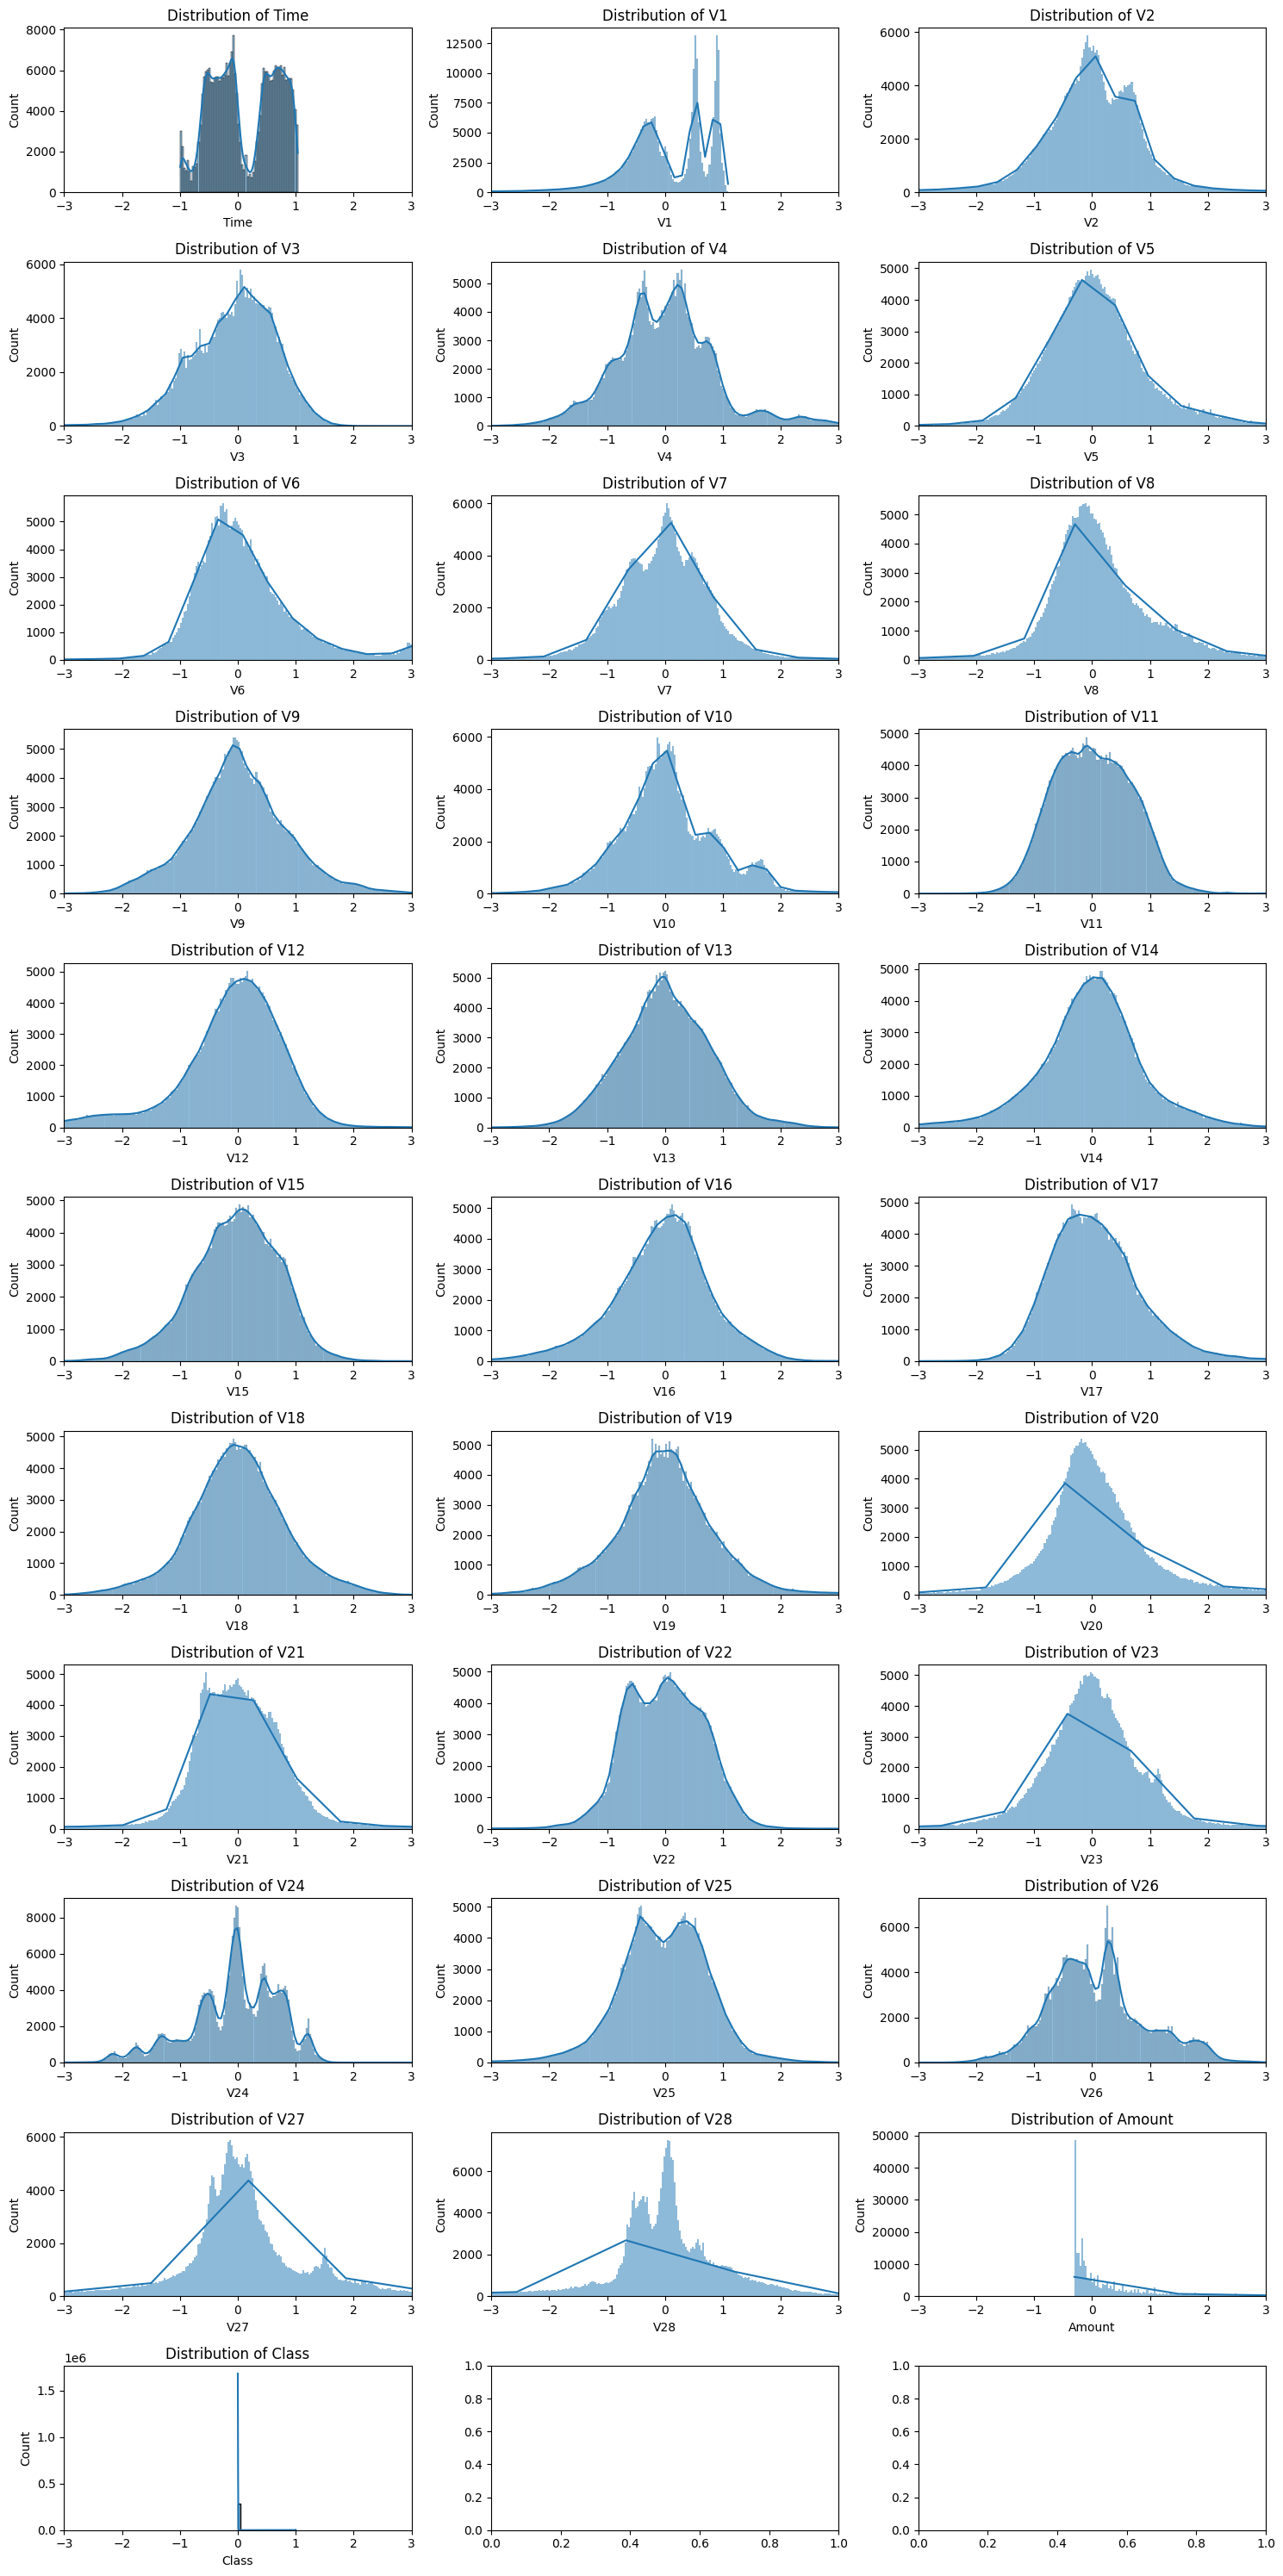

In [17]:
fig, axes = plt.subplots(11, 3, figsize=(15, 30))
for i, column in enumerate(df_scaled.columns[:31]):
    sns.histplot(df_scaled[column], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {column}')
    axes[i // 3, i % 3].set_xlim(-3, 3)  # Set x-limits to see the effect of scaling

plt.tight_layout()
plt.show()


In [25]:
df_scaled.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

## Applying weights for Different classes :
<p style="font-size: 16px; color: #22b2a3;">
    Now, we have reached the part where I mentioned class weighting earlier. 
</p>

<p style="font-size: 16px; color: #22b2a3;">
    <strong># Define custom class weights, applying more penalty for fraud (class 1)</strong><br>
    In this code, we are assigning custom class weights to balance the model’s attention between the classes. Class 0 (non-fraud) is assigned a weight of 1, while class 1 (fraud) is assigned a weight of 15. This means the model will penalize misclassifying fraud cases more heavily, encouraging it to better detect fraudulent transactions despite the imbalance.
</p>


In [29]:
# Define custom class weights, applying more penalty for fraud (class 1)
class_weights = {0: 1, 1: 15}

## Training the model:

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_scaled.drop(columns=['class'])
y = df_scaled['class']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

# Result explanations:

<h3 style="font-size: 18px; color: #c92966;">Model Performance Analysis</h3>

<p style="font-size: 16px; color: #22b2a3;">
    Based on the provided confusion matrix and the AUC of 0.96, the model is performing very well, especially for such an imbalanced dataset.
</p>

<h3 style="font-size: 18px; color: #c92966;">Key Metrics:</h3>

<ul style="font-size: 16px; color: #22b2a3;">
    <li><strong>True Negatives (56861)</strong>: These are the non-fraudulent transactions that the model correctly identified as non-fraudulent. This is a very high number, indicating the model's strong ability to correctly classify the majority class.</li>
    <li><strong>False Positives (3)</strong>: These are the non-fraudulent transactions incorrectly classified as fraudulent. The very low count of false positives is a good indication that the model is not significantly disrupting genuine transactions.</li>
    <li><strong>True Positives (75)</strong>: These are the fraudulent transactions correctly identified by the model. The model is correctly flagging a significant number of fraud cases despite the class imbalance.</li>
    <li><strong>False Negatives (23)</strong>: These are the fraudulent transactions that were incorrectly classified as non-fraudulent. This number shows that the model is missing some fraud cases, which is common in imbalanced datasets, but the low count shows the model's effectiveness.</li>
</ul>

<h3 style="font-size: 18px; color: #c92966;">AUC (Area Under Curve) = 0.96</h3>

<p style="font-size: 16px; color: #22b2a3;">
    An <strong>AUC of 0.96</strong> demonstrates the model's excellent ability to distinguish between fraudulent and non-fraudulent transactions. The closer the AUC is to 1, the better the model is at distinguishing between the two classes, meaning this model is highly effective.
</p>

<h3 style="font-size: 18px; color: #c92966;">Summary:</h3>

<p style="font-size: 16px; color: #22b2a3;">
    <strong>High Precision</strong>: The model is minimizing false positives (only 3), meaning that most transactions flagged as fraud are indeed fraudulent.
</p>
<p style="font-size: 16px; color: #22b2a3;">
    <strong>High Recall</strong>: The model is identifying the majority of fraudulent transactions (75 true positives), though it does miss a few (23 false negatives).
</p>
<p style="font-size: 16px; color: #22b2a3;">
    <strong>Balanced Performance</strong>: With an AUC of 0.96, the model is performing very well, effectively balancing between catching fraudulent transactions and minimizing disruptions for non-fraudulent transactions.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    This suggests the model is well-suited for the task of fraud detection in this dataset, especially considering the imbalanced nature of the data.
</p>


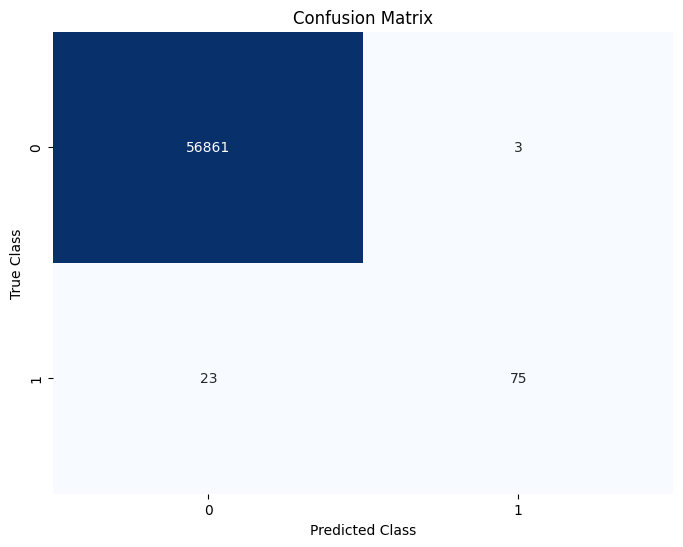

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)  # fmt='g' formats the values as integers
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

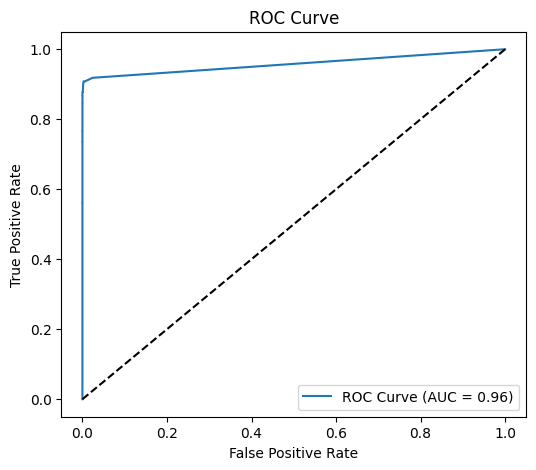

AUC Score: 0.96


In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for class 1 (fraud)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC score
print(f"AUC Score: {auc_score:.2f}")

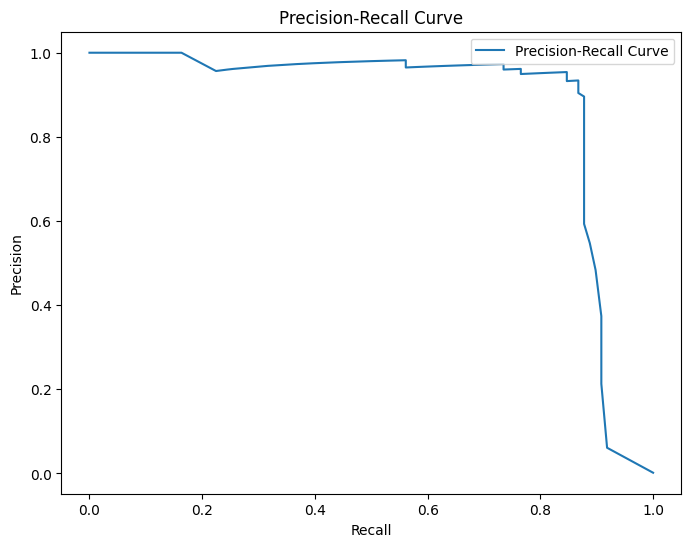

In [44]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [45]:
from sklearn.metrics import f1_score

# F1-score for each class
f1 = f1_score(y_test, y_pred, average='weighted')  # You can also use 'macro' or 'micro'
print(f"Weighted F1-Score: {f1:.2f}")


Weighted F1-Score: 1.00


# Checking the feature importance of the model: 

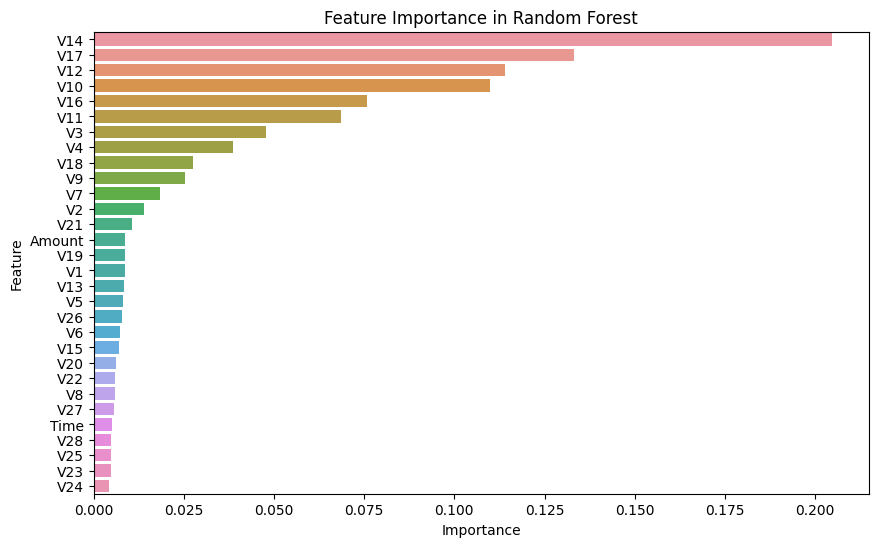

In [46]:
# Extract feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


# Appreciation

<p style="font-size: 16px; color: #22b2a3;">
    If you found this project helpful, I'd be happy if you could upvote the project for me.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    If you have any ideas that could help the model perform better, I'd also appreciate the suggestions.
</p>

<p style="font-size: 16px; color: #22b2a3;">
    If you have any questions, feel free to comment or contact me via: <strong>Shahbods26@gmail.com</strong>
</p>
